<a href="https://colab.research.google.com/github/marciel-gomes/podacademy_s11/blob/main/pod_001_pos_cash_balance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
df_00 = pd.read_csv('/content/pod/raw/POS_CASH_balance.csv',
                            delimiter=',',
                            encoding='ISO-8859-1' #'utf-8' 'latin1'
                            )
df_00.shape

(2267507, 8)

In [10]:
# Visualizar as 5 primeiras linhas do arquivo
df_00.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31.0,48.0,45.0,Active,0.0,0.0
1,1715348,367990,-33.0,36.0,35.0,Active,0.0,0.0
2,1784872,397406,-32.0,12.0,9.0,Active,0.0,0.0
3,1903291,269225,-35.0,48.0,42.0,Active,0.0,0.0
4,2341044,334279,-35.0,36.0,35.0,Active,0.0,0.0


In [11]:
# Visualizar as últimas linhas do arquivo
df_00.tail()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
2267502,2371652,204604,-38.0,36.0,36.0,Active,0.0,0.0
2267503,1125249,197851,-34.0,12.0,9.0,Active,0.0,0.0
2267504,1517898,376765,-33.0,12.0,6.0,Active,0.0,0.0
2267505,1575434,335311,-36.0,1.0,0.0,Completed,0.0,0.0
2267506,1137243,1522,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# verificando o tipo dos dados
df_00.dtypes

SK_ID_PREV                 int64
SK_ID_CURR                 int64
MONTHS_BALANCE           float64
CNT_INSTALMENT           float64
CNT_INSTALMENT_FUTURE    float64
NAME_CONTRACT_STATUS      object
SK_DPD                   float64
SK_DPD_DEF               float64
dtype: object

In [14]:
# Verificar quais valores são nulos
print(df_00.isnull())

# Contar valores nulos por coluna
print(df_00.isnull().sum())

         SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0             False       False           False           False   
1             False       False           False           False   
2             False       False           False           False   
3             False       False           False           False   
4             False       False           False           False   
...             ...         ...             ...             ...   
2267502       False       False           False           False   
2267503       False       False           False           False   
2267504       False       False           False           False   
2267505       False       False           False           False   
2267506       False       False            True            True   

         CNT_INSTALMENT_FUTURE  NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                        False                 False   False       False  
1                        False               

In [23]:
# # # Excluir linhas com valores nulos
# df_drop_rows = df_00.dropna()
# df_drop_rows

In [22]:
# # Excluir colunas com valores nulos
# df_drop_columns = df_00.dropna(axis=1)
# df_drop_columns

In [ ]:
# # Preencher valores nulos com zero
# df_fill_zero = df.fillna(0)

# df_fill_zero

In [ ]:
# # Preencher valores nulos com a média da coluna
# df_fill_mean = df.fillna(df.mean())
# df_fill_mean

In [25]:
def generate_metadata(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata=metadata.sort_values(by='tipo')
    metadata = metadata.reset_index(drop=True)

    return metadata

# Testando a função com o dataframe dados_prf_2023
metadata_df = generate_metadata(df_00)
metadata_df

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,SK_ID_PREV,int64,0,0.00,721382
1,SK_ID_CURR,int64,0,0.00,304103
2,MONTHS_BALANCE,float64,1,0.00,96
3,CNT_INSTALMENT,float64,3928,0.17,67
4,CNT_INSTALMENT_FUTURE,float64,3931,0.17,76
5,SK_DPD,float64,1,0.00,579
6,SK_DPD_DEF,float64,1,0.00,158
7,NAME_CONTRACT_STATUS,object,1,0.00,8


In [26]:
metadata_df.to_csv('/content/pod/raw/POS_CASH_balance_mtd.csv')

# Estatística Descritiva

In [28]:
# Estatística descritiva apenas para numéricas
df_00.describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,2.267507e+06,2.267507e+06,2.267506e+06,2.263579e+06,2.263576e+06,2.267506e+06,2.267506e+06
mean,1.904618e+06,2.785433e+05,-2.949905e+01,2.008940e+01,1.310807e+01,4.312963e-01,6.961084e-02
std,5.355311e+05,1.027300e+05,2.422980e+01,1.395234e+01,1.290337e+01,1.835847e+01,1.540118e+00
min,1.000001e+06,1.522000e+03,-9.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434960e+06,1.896995e+05,-4.200000e+01,1.000000e+01,4.000000e+00,0.000000e+00,0.000000e+00
50%,1.899016e+06,2.788770e+05,-2.000000e+01,1.200000e+01,9.000000e+00,0.000000e+00,0.000000e+00
75%,2.369702e+06,3.676410e+05,-1.100000e+01,2.400000e+01,1.900000e+01,0.000000e+00,0.000000e+00
max,2.843499e+06,4.562550e+05,-1.000000e+00,9.200000e+01,8.500000e+01,2.945000e+03,3.570000e+02


In [29]:
# Estatística descritiva completa
df_00.describe(include='all')

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
count,2.267507e+06,2.267507e+06,2.267506e+06,2.263579e+06,2.263576e+06,2267506,2.267506e+06,2.267506e+06
unique,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Active,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,2109083,NaN,NaN
mean,1.904618e+06,2.785433e+05,-2.949905e+01,2.008940e+01,1.310807e+01,NaN,4.312963e-01,6.961084e-02
std,5.355311e+05,1.027300e+05,2.422980e+01,1.395234e+01,1.290337e+01,NaN,1.835847e+01,1.540118e+00
min,1.000001e+06,1.522000e+03,-9.600000e+01,1.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,1.434960e+06,1.896995e+05,-4.200000e+01,1.000000e+01,4.000000e+00,NaN,0.000000e+00,0.000000e+00
50%,1.899016e+06,2.788770e+05,-2.000000e+01,1.200000e+01,9.000000e+00,NaN,0.000000e+00,0.000000e+00
75%,2.369702e+06,3.676410e+05,-1.100000e+01,2.400000e+01,1.900000e+01,NaN,0.000000e+00,0.000000e+00


In [32]:
# # Mostrar Box Plot para uma variável desejada
# plt.figure(figsize=(8, 6))
# df_00.boxplot(column='SK_ID_PREV')
# plt.title('Boxplot da Variável - SK_ID_PREV')
# plt.ylabel('Valores')
# plt.show()

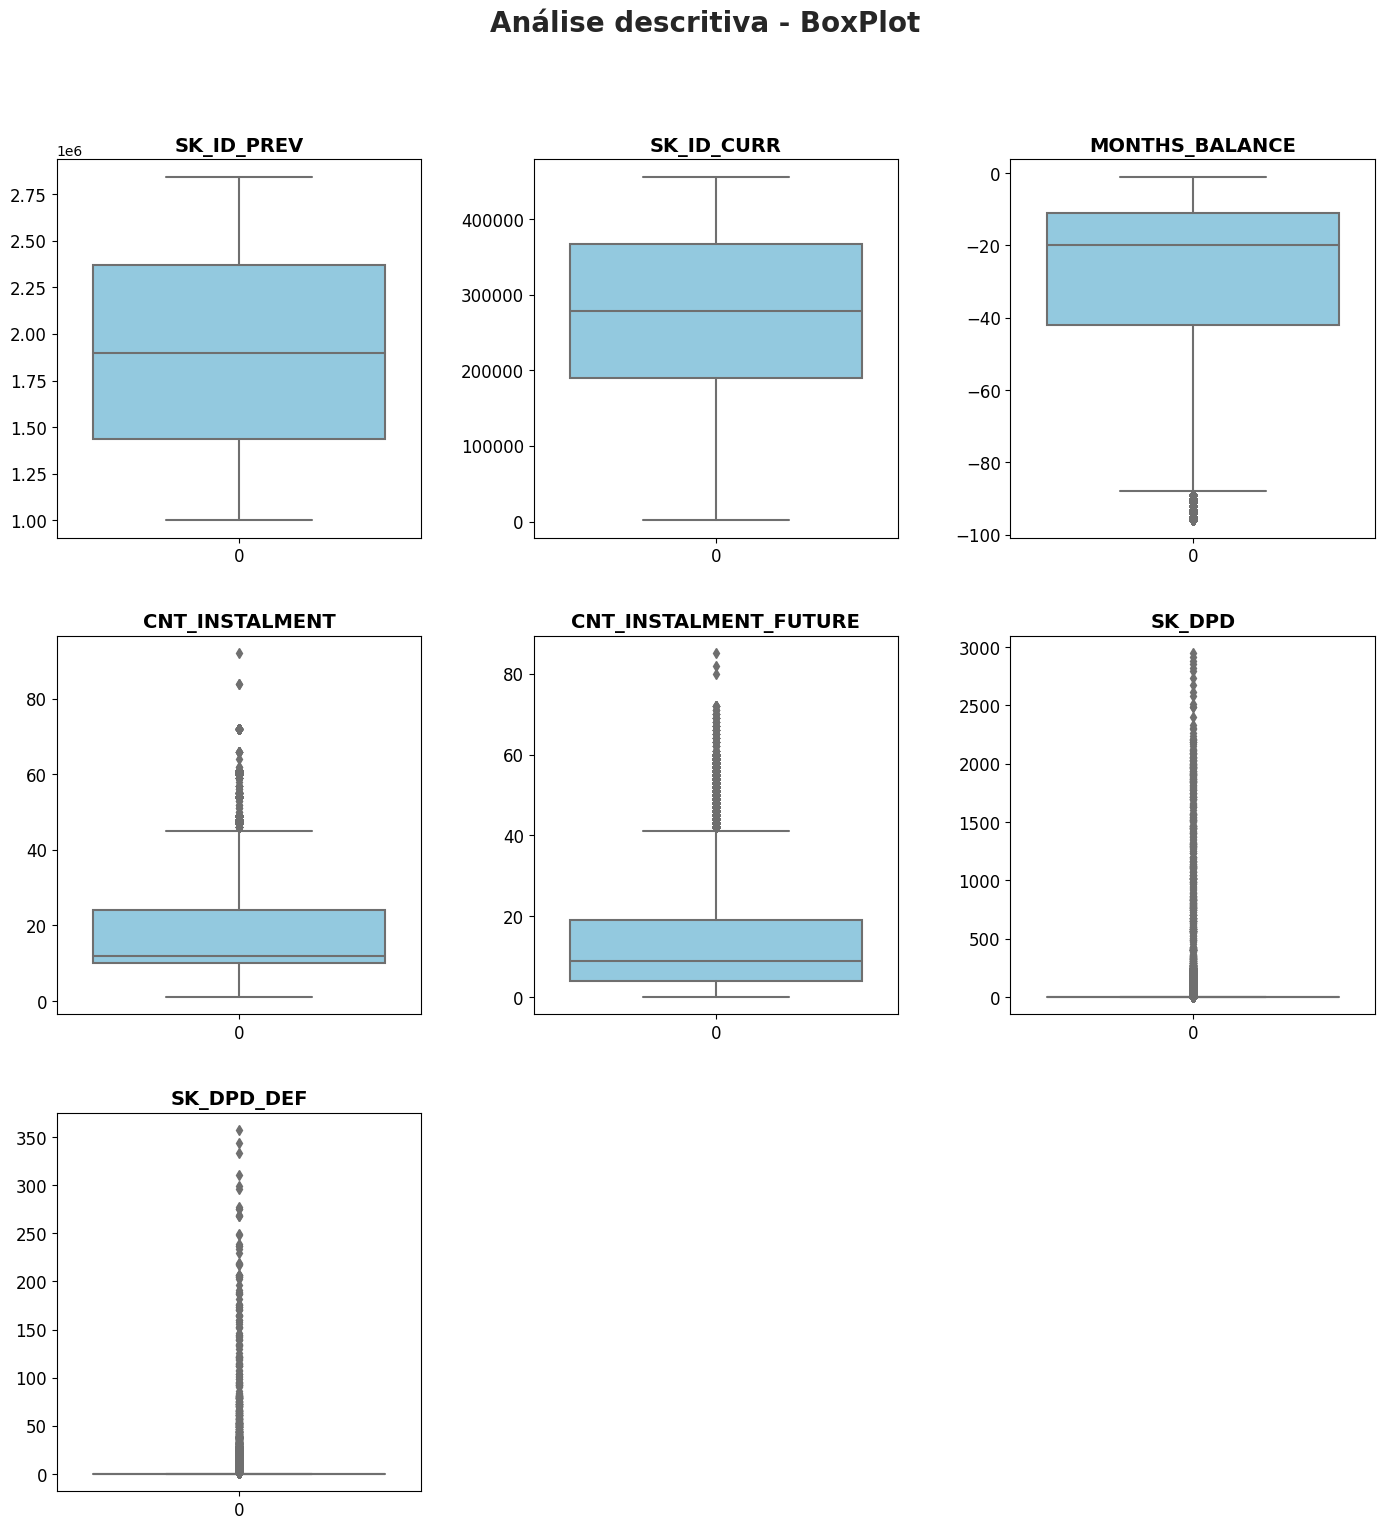

In [33]:
def pod_academy_box_plot(dataframe):
    """
    Plota boxplots estilizados com título simplificado para todas as variáveis numéricas do dataframe fornecido
    em um painel com 3 gráficos por linha.

    :param dataframe: DataFrame para o qual os boxplots serão gerados.
    """
    # Seleciona apenas colunas numéricas
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns

    # Define o número de linhas com base no número de colunas numéricas
    nrows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)

    # Inicializa o painel de gráficos
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 5))

    # Ajusta o layout
    plt.tight_layout(pad=5)

    # Configura estilo e paleta de cores
    sns.set_style("whitegrid")

    # Plota boxplots para cada coluna numérica
    for i, column in enumerate(numeric_columns):
        sns.boxplot(data=dataframe[column], ax=axes[i//3, i%3], color="skyblue")
        axes[i//3, i%3].set_title(f'{column}', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        axes[i//3, i%3].set_ylabel('')
        axes[i//3, i%3].tick_params(axis='both', which='major', labelsize=12)

    # Remove gráficos vazios (se houver)
    for j in range(i+1, nrows*3):
        fig.delaxes(axes.flatten()[j])

    # Adiciona título principal
    fig.suptitle("Análise descritiva - BoxPlot", fontsize=20, fontweight='bold', y=1.05)

# Plotando os boxplots estilizados com títulos simplificados usando a função definida
pod_academy_box_plot(df_00)

> Histograma

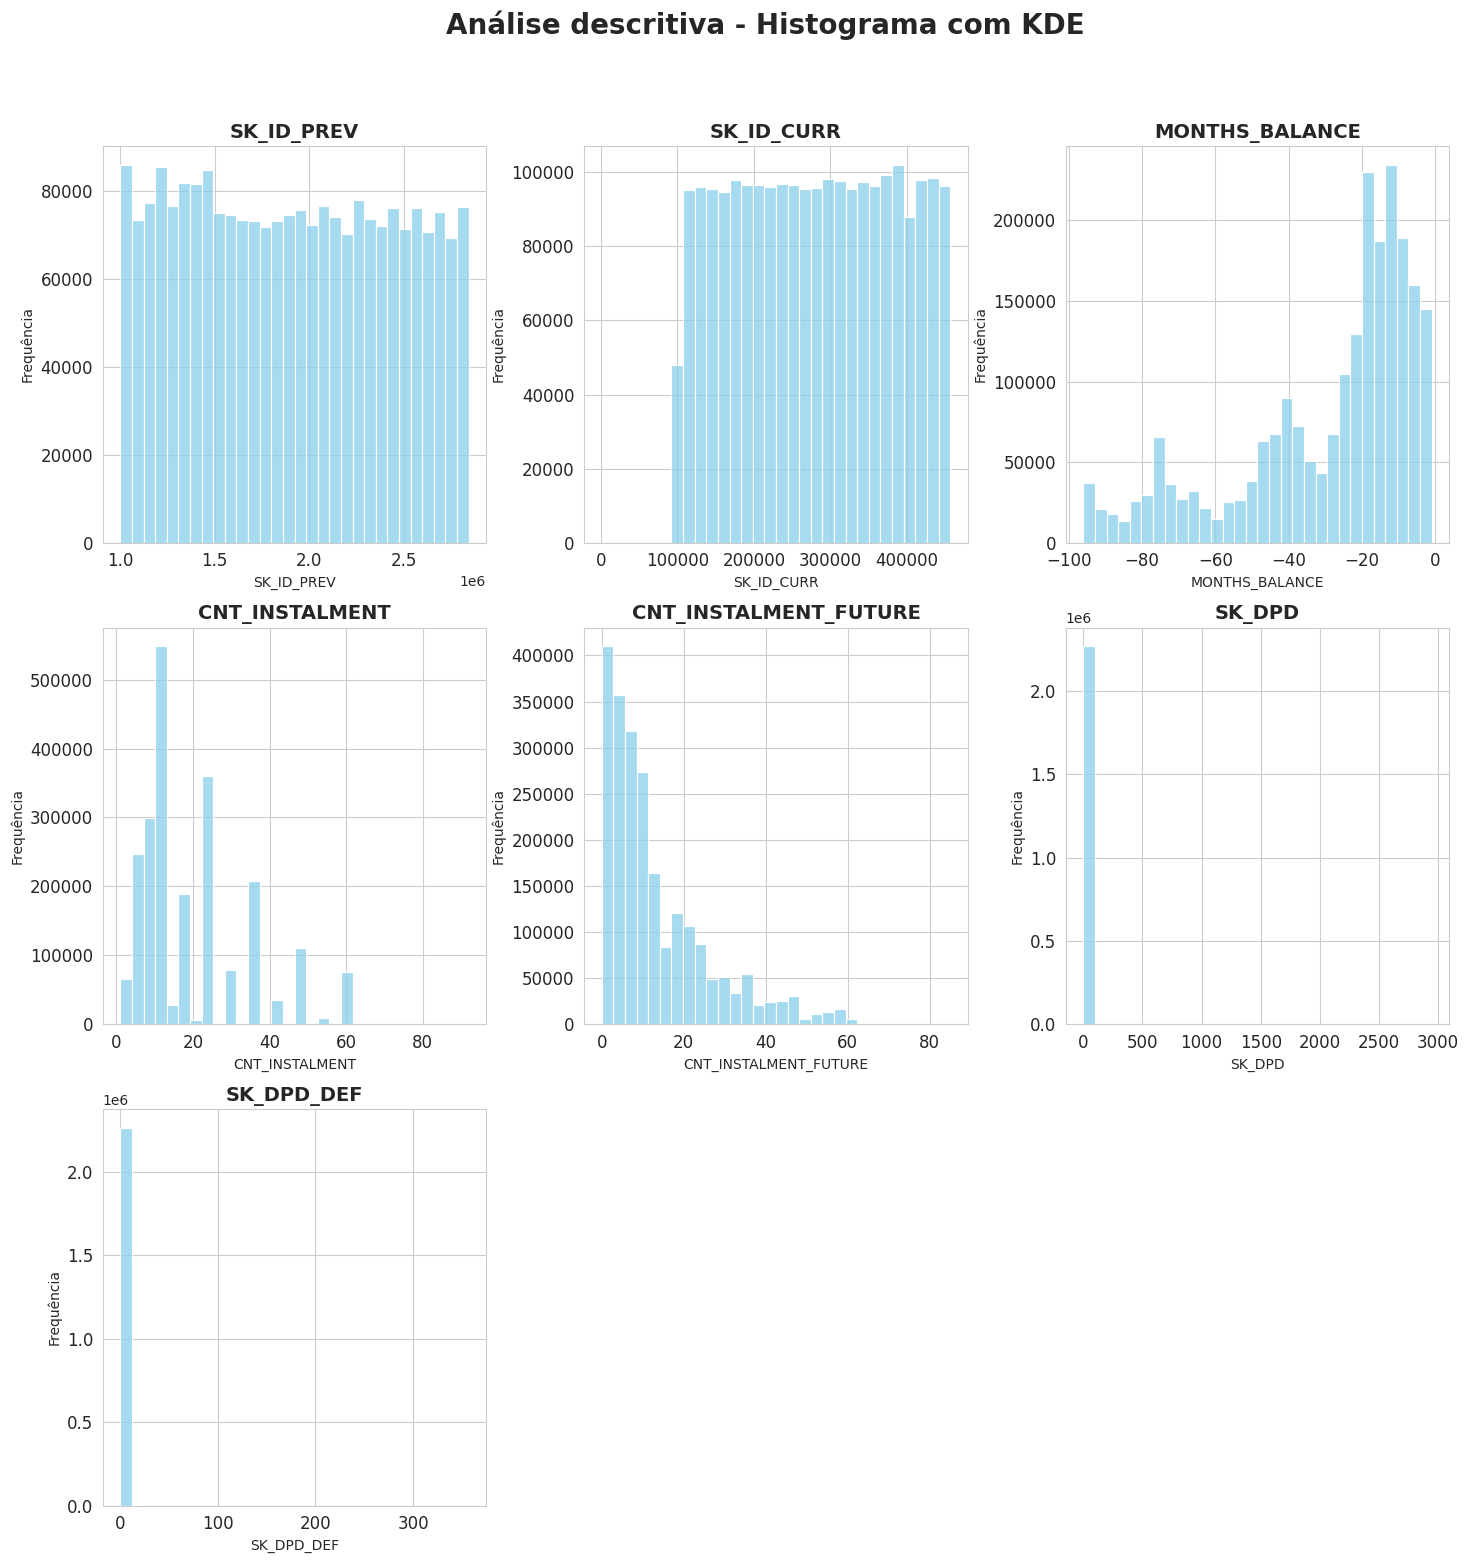

In [35]:
def pod_academy_histograms(dataframe):
    """
    Plota histogramas corrigidos com a curva KDE (Kernel Density Estimation) para todas as variáveis numéricas
    do dataframe fornecido em um painel com 3 gráficos por linha.

    :param dataframe: DataFrame para o qual os histogramas serão gerados.
    """
    # Seleciona apenas colunas numéricas
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns

    # Define o número de linhas com base no número de colunas numéricas
    nrows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)

    # Inicializa o painel de gráficos
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 5))

    # Ajusta o layout
    plt.tight_layout(pad=4)

    # Configura estilo e paleta de cores
    sns.set_style("whitegrid")

    # Plota histogramas com KDE para cada coluna numérica
    for i, column in enumerate(numeric_columns):
        sns.histplot(data=dataframe[column], ax=axes[i//3, i%3], color="skyblue", bins=30, kde=False)
        axes[i//3, i%3].set_title(f'{column}', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        axes[i//3, i%3].set_ylabel('Frequência')
        axes[i//3, i%3].tick_params(axis='both', which='major', labelsize=12)

    # Remove gráficos vazios (se houver)
    for j in range(i+1, nrows*3):
        fig.delaxes(axes.flatten()[j])

    # Adiciona título principal
    fig.suptitle("Análise descritiva - Histograma com KDE", fontsize=20, fontweight='bold', y=1.05)

# Plotando os histogramas com KDE corrigidos em um painel usando a função definida
pod_academy_histograms(df_00)

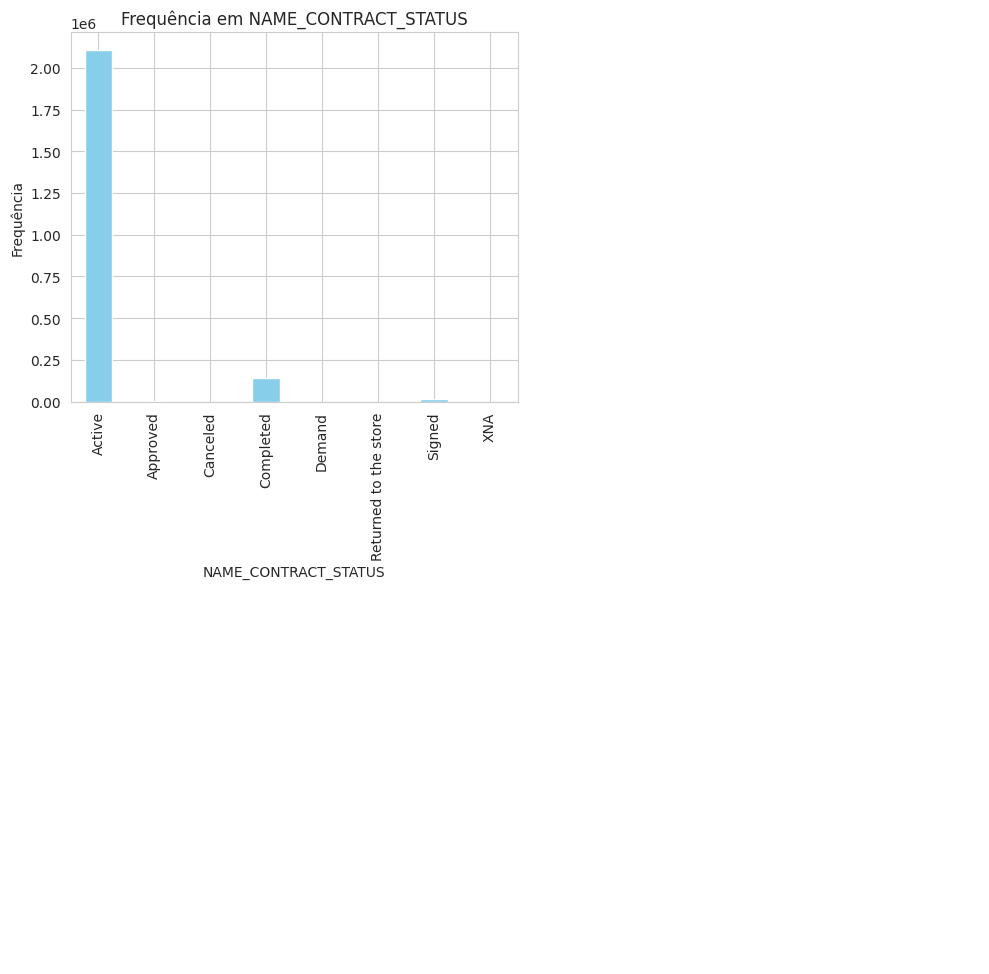

In [45]:
def plot_categorical_frequency_pt(df, corte_cardinalidade=30, graficos_por_linha=2):
    """
    Plota a frequência de categorias para variáveis categóricas em um DataFrame.

    Parâmetros:
    - df: DataFrame para plotagem.
    - corte_cardinalidade: Cardinalidade máxima para uma coluna ser considerada (padrão é 30).
    - graficos_por_linha: Quantidade de gráficos por linha (padrão é 3).

    Retorna:
    - Exibe os gráficos de barras.
    """

    # Gera metadados para o DataFrame
    metadados = []
    for coluna in df.columns:
        metadados.append({
            'Variável': coluna,
            'Tipo': df[coluna].dtype,
            'Cardinalidade': df[coluna].nunique()
        })

    df_metadados = pd.DataFrame(metadados)

    # Filtra colunas com cardinalidade maior que o corte e tipos não numéricos
    variaveis_categoricas = df_metadados[(df_metadados['Cardinalidade'] <= corte_cardinalidade) & (df_metadados['Tipo'] == 'object')]

    # Calcula o número de linhas e colunas para os subplots
    n_linhas = -(-len(variaveis_categoricas) // graficos_por_linha) +1 # Ceiling division
    n_colunas = min(len(variaveis_categoricas), graficos_por_linha) +1
    # Plota as variáveis categóricas
    fig, axes = plt.subplots(nrows=n_linhas, ncols=n_colunas, figsize=(10, 5 * n_linhas))

    for i, (idx, linha) in enumerate(variaveis_categoricas.iterrows()):
        var = linha['Variável']
        ax = axes[i//graficos_por_linha, i%graficos_por_linha]
        df[var].value_counts().sort_index().plot(kind='bar', ax=ax, color='skyblue')
        ax.set_title(f'Frequência em {var}')
        ax.set_ylabel('Frequência')
        ax.set_xlabel(var)

    # Remove os eixos vazios, se houver
    for j in range(i + 1, n_linhas * n_colunas):
        axes[j // graficos_por_linha, j % graficos_por_linha].axis('off')

    plt.tight_layout()
    plt.show()

# Testa a função com os dados e o corte padrão de cardinalidade
plot_categorical_frequency_pt(df_00, corte_cardinalidade=30, graficos_por_linha=2)
